<a href="https://colab.research.google.com/github/Mohammed-Taha20/alzheimers_prediction/blob/main/alzheimers_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Data


In [ ]:
!kaggle datasets download ankushpanday1/alzheimers-prediction-dataset-global

Dataset URL: https://www.kaggle.com/datasets/ankushpanday1/alzheimers-prediction-dataset-global
License(s): MIT
alzheimers-prediction-dataset-global.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/alzheimers-prediction-dataset-global.zip

Archive:  /content/alzheimers-prediction-dataset-global.zip
replace alzheimers_prediction_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
df=pd.read_csv('/content/alzheimers_prediction_dataset.csv')
df

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74278,Russia,60,Female,3,22.6,High,Former,Never,No,No,...,Average,High,Unemployed,Widowed,No,Medium,High,Medium,Rural,No
74279,UK,58,Male,18,30.6,Low,Never,Occasionally,Yes,No,...,Average,Medium,Unemployed,Single,No,Medium,High,High,Rural,No
74280,Spain,57,Female,13,28.2,Medium,Never,Regularly,No,No,...,Healthy,Low,Employed,Single,Yes,High,Low,Low,Rural,No
74281,Brazil,73,Female,7,29.0,Low,Never,Regularly,No,No,...,Healthy,Low,Employed,Widowed,No,Low,Low,High,Rural,No


# Data Cleaning


## Removing duplicates


In [ ]:
df.drop_duplicates(inplace=True)

## Quick View for the the data
We can use .describe() and .info()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74283 entries, 0 to 74282
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               74283 non-null  object 
 1   Age                                   74283 non-null  int64  
 2   Gender                                74283 non-null  object 
 3   Education Level                       74283 non-null  int64  
 4   BMI                                   74283 non-null  float64
 5   Physical Activity Level               74283 non-null  object 
 6   Smoking Status                        74283 non-null  object 
 7   Alcohol Consumption                   74283 non-null  object 
 8   Diabetes                              74283 non-null  object 
 9   Hypertension                          74283 non-null  object 
 10  Cholesterol Level                     74283 non-null  object 
 11  Family History 

In [ ]:
df.describe()

,Age,Education Level,BMI,Cognitive Test Score
count,74283.000000,74283.000000,74283.000000,74283.000000
mean,71.964703,9.487514,26.780639,64.654241
std,12.980748,5.757020,4.764679,20.153247
min,50.000000,0.000000,18.500000,30.000000
25%,61.000000,4.000000,22.700000,47.000000
50%,72.000000,9.000000,26.800000,65.000000
75%,83.000000,14.000000,30.900000,82.000000
max,94.000000,19.000000,35.000000,99.000000


## Converting data types


In [ ]:
education_mapping = {
    0: "No formal education",
    1: "Primary school",
    2: "Primary school",
    3: "Primary school",
    4: "Primary school",
    5: "Primary school",
    6: "Primary school",
    7: "High school",
    8: "High school",
    9: "High school",
    10: "Associate degree",
    11: "Associate degree",
    12: "Associate degree",
    13: "Bachelor's degree",
    14: "Bachelor's degree",
    15: "Bachelor's degree",
    16: "Bachelor's degree",
    17: "Master's degree",
    18: "Master's degree",
    19: "Master's degree",
    20: "Doctorate",
    21: "Doctorate",
    22: "Doctorate"
}

# Replace numerical values with education level labels
df['Education Level'] = df['Education Level'].replace(education_mapping)

In [ ]:
df['Grade'] = pd.cut(df['Cognitive Test Score'],
                     bins=[-1, 59, 69, 79, 89, 100],
                     labels=['F', 'D', 'C', 'B', 'A']).astype(str)


In [ ]:
df.drop('Cognitive Test Score',axis=1,inplace=True)

<Axes: xlabel='Age', ylabel='Alzheimer’s Diagnosis'>

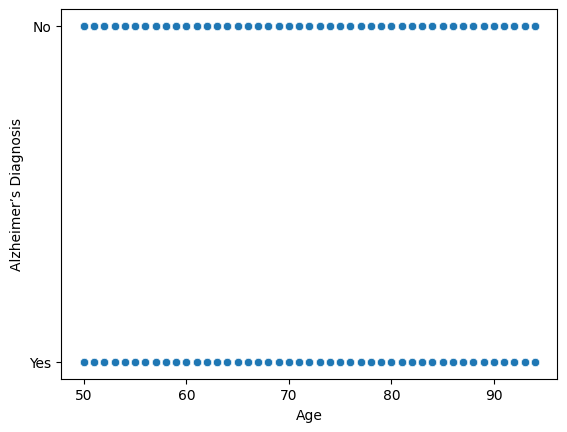

In [ ]:
sns.scatterplot(data=df, x='Age', y='Alzheimer’s Diagnosis')

<ipython-input-16-3b201c5305cc>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  df.groupby('Age')['Alzheimer’s Diagnosis'].apply(pd.value_counts).unstack().plot(kind='bar', figsize=(10, 6))
<ipython-input-16-3b201c5305cc>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  df.groupby('Age')['Alzheimer’s Diagnosis'].apply(pd.value_counts).unstack().plot(kind='bar', figsize=(10, 6))
<ipython-input-16-3b201c5305cc>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  df.groupby('Age')['Alzheimer’s Diagnosis'].apply(pd.value_counts).unstack().plot(kind='bar', figsize=(10, 6))
<ipython-input-16-3b201c5305cc>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() i

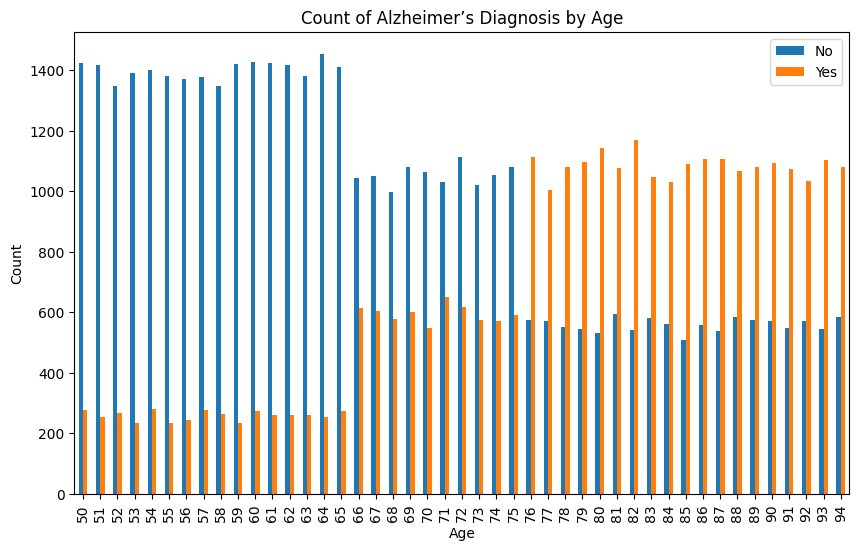

In [ ]:
df.groupby('Age')['Alzheimer’s Diagnosis'].apply(pd.value_counts).unstack().plot(kind='bar', figsize=(10, 6))
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Count of Alzheimer’s Diagnosis by Age')
plt.show()

we can say there is category of ages from 50 to 65 with about 10% probability of haveing Alzheimer

and another one from 66 to 75 with about 40% probability of haveing Alzheimer

and another one from 76 to 94 with about 60% probability of haveing Alzheimer


so i will category there groups

first group is A
second group is B
third group is C

In [ ]:
df['Age_categories'] = pd.cut(df['Age'],
                     bins=[-1,65, 75, 94],
                     labels=['A', 'B', 'C']).astype(str)

In [ ]:
df.drop('Age',axis=1,inplace=True)

<Axes: xlabel='BMI', ylabel='Alzheimer’s Diagnosis'>

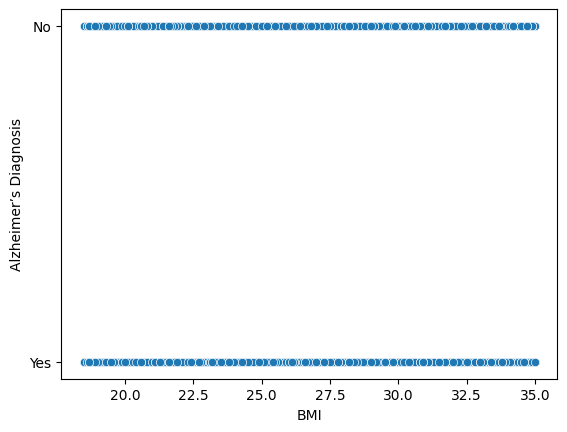

In [ ]:
sns.scatterplot(data=df, x='BMI', y='Alzheimer’s Diagnosis')

<ipython-input-20-1fb7fbe1c860>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  df.groupby('BMI')['Alzheimer’s Diagnosis'].apply(pd.value_counts).unstack().plot(kind='bar', figsize=(20, 6))
<ipython-input-20-1fb7fbe1c860>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  df.groupby('BMI')['Alzheimer’s Diagnosis'].apply(pd.value_counts).unstack().plot(kind='bar', figsize=(20, 6))
<ipython-input-20-1fb7fbe1c860>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  df.groupby('BMI')['Alzheimer’s Diagnosis'].apply(pd.value_counts).unstack().plot(kind='bar', figsize=(20, 6))
<ipython-input-20-1fb7fbe1c860>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() i

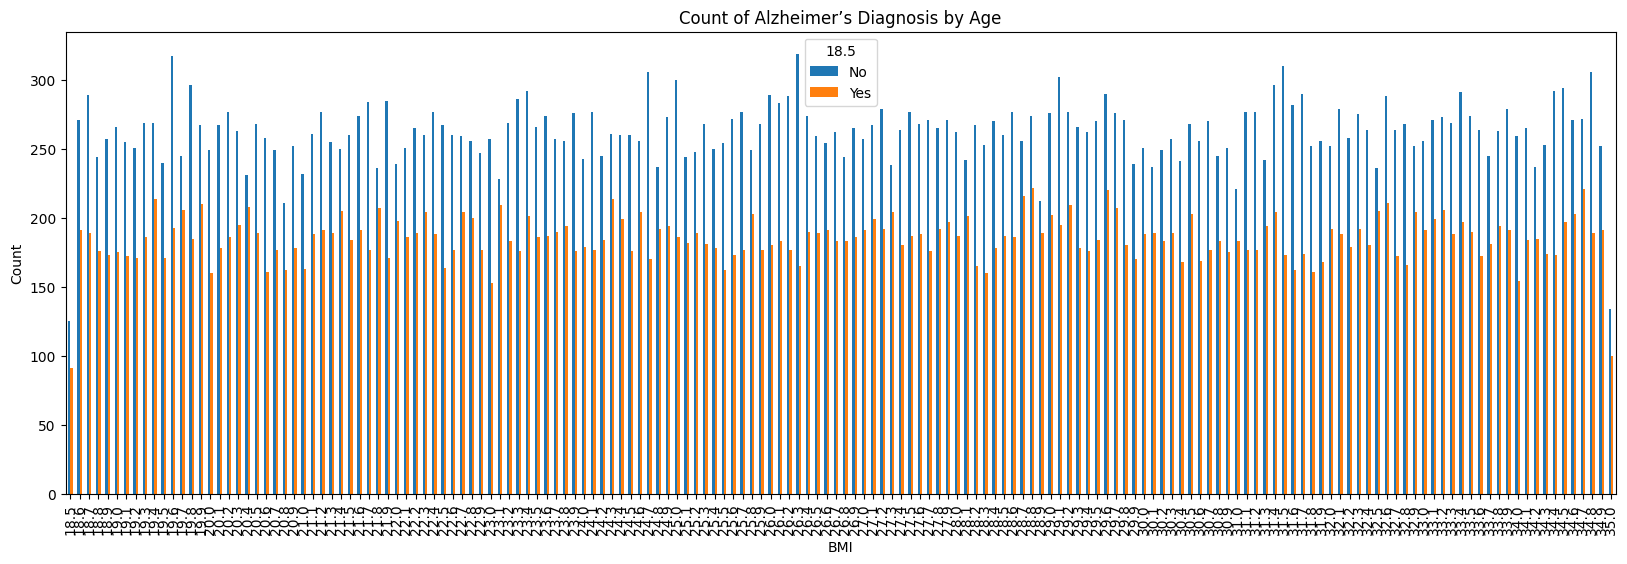

In [ ]:
df.groupby('BMI')['Alzheimer’s Diagnosis'].apply(pd.value_counts).unstack().plot(kind='bar', figsize=(20, 6))
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('Count of Alzheimer’s Diagnosis by Age')
plt.show()

looks like BMI cant be reason Alzheimer
with any BMI value about 40% of the people has Alzheimer and the rest of them are ok
so i assume it has no effect of have Alzheimer or no

In [ ]:
df.drop('BMI',axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74283 entries, 0 to 74282
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Country                               74283 non-null  object
 1   Gender                                74283 non-null  object
 2   Education Level                       74283 non-null  object
 3   Physical Activity Level               74283 non-null  object
 4   Smoking Status                        74283 non-null  object
 5   Alcohol Consumption                   74283 non-null  object
 6   Diabetes                              74283 non-null  object
 7   Hypertension                          74283 non-null  object
 8   Cholesterol Level                     74283 non-null  object
 9   Family History of Alzheimer’s         74283 non-null  object
 10  Depression Level                      74283 non-null  object
 11  Sleep Quality               

# Data Preprocessing


In [ ]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
le=LabelEncoder()
ohe=OneHotEncoder()
label_encodeing_columns=['Education Level','Physical Activity Level','Depression Level', 'Sleep Quality',
       'Dietary Habits', 'Air Pollution Exposure','Social Engagement Level', 'Income Level', 'Stress Levels','Grade','Age_categories', 'Alzheimer’s Diagnosis']
OneHot_encodeing_columns=['Country','Gender','Smoking Status','Alcohol Consumption','Diabetes','Hypertension', 'Cholesterol Level',
       'Family History of Alzheimer’s','Employment Status',
       'Marital Status','Genetic Risk Factor (APOE-ε4 allele)','Urban vs Rural Living']



le = LabelEncoder()
for col in label_encodeing_columns:
    df[col] = le.fit_transform(df[col])

ohe = OneHotEncoder(sparse_output=False)
onehot_encoded = ohe.fit_transform(df[OneHot_encodeing_columns])

onehot_df = pd.DataFrame(onehot_encoded, columns=ohe.get_feature_names_out(OneHot_encodeing_columns))

df = df.drop(columns=OneHot_encodeing_columns)
df = pd.concat([df, onehot_df], axis=1)
df

,Education Level,Physical Activity Level,Depression Level,Sleep Quality,Dietary Habits,Air Pollution Exposure,Social Engagement Level,Income Level,Stress Levels,Alzheimer’s Diagnosis,...,Employment Status_Employed,Employment Status_Retired,Employment Status_Unemployed,Marital Status_Married,Marital Status_Single,Marital Status_Widowed,Genetic Risk Factor (APOE-ε4 allele)_No,Genetic Risk Factor (APOE-ε4 allele)_Yes,Urban vs Rural Living_Rural,Urban vs Rural Living_Urban
0,5,2,1,2,1,0,1,2,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,2,2,1,1,1,2,0,1,0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,3,0,0,1,0,2,1,2,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,3,1,2,0,1,2,0,2,1,0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5,0,0,2,2,0,1,2,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74278,5,0,2,2,0,0,2,0,2,0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
74279,3,1,1,2,0,2,2,0,0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
74280,1,2,1,1,1,1,0,1,1,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
74281,2,1,0,1,1,1,1,1,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [ ]:
df.columns

Index(['Education Level', 'Physical Activity Level', 'Depression Level',
       'Sleep Quality', 'Dietary Habits', 'Air Pollution Exposure',
       'Social Engagement Level', 'Income Level', 'Stress Levels',
       'Alzheimer’s Diagnosis', 'Grade', 'Age_categories', 'Country_Argentina',
       'Country_Australia', 'Country_Brazil', 'Country_Canada',
       'Country_China', 'Country_France', 'Country_Germany', 'Country_India',
       'Country_Italy', 'Country_Japan', 'Country_Mexico', 'Country_Norway',
       'Country_Russia', 'Country_Saudi Arabia', 'Country_South Africa',
       'Country_South Korea', 'Country_Spain', 'Country_Sweden', 'Country_UK',
       'Country_USA', 'Gender_Female', 'Gender_Male', 'Smoking Status_Current',
       'Smoking Status_Former', 'Smoking Status_Never',
       'Alcohol Consumption_Never', 'Alcohol Consumption_Occasionally',
       'Alcohol Consumption_Regularly', 'Diabetes_No', 'Diabetes_Yes',
       'Hypertension_No', 'Hypertension_Yes', 'Cholesterol Lev

# Data Visualization


In [ ]:
df.columns

Index(['Education Level', 'Physical Activity Level', 'Depression Level',
       'Sleep Quality', 'Dietary Habits', 'Air Pollution Exposure',
       'Social Engagement Level', 'Income Level', 'Stress Levels',
       'Alzheimer’s Diagnosis', 'Grade', 'Age_categories', 'Country_Argentina',
       'Country_Australia', 'Country_Brazil', 'Country_Canada',
       'Country_China', 'Country_France', 'Country_Germany', 'Country_India',
       'Country_Italy', 'Country_Japan', 'Country_Mexico', 'Country_Norway',
       'Country_Russia', 'Country_Saudi Arabia', 'Country_South Africa',
       'Country_South Korea', 'Country_Spain', 'Country_Sweden', 'Country_UK',
       'Country_USA', 'Gender_Female', 'Gender_Male', 'Smoking Status_Current',
       'Smoking Status_Former', 'Smoking Status_Never',
       'Alcohol Consumption_Never', 'Alcohol Consumption_Occasionally',
       'Alcohol Consumption_Regularly', 'Diabetes_No', 'Diabetes_Yes',
       'Hypertension_No', 'Hypertension_Yes', 'Cholesterol Lev

##Histograms
Use .hist() in pandas to get a visual representation of the distribution of a numeric variable. This can reveal outliers, skewness, and other patterns.

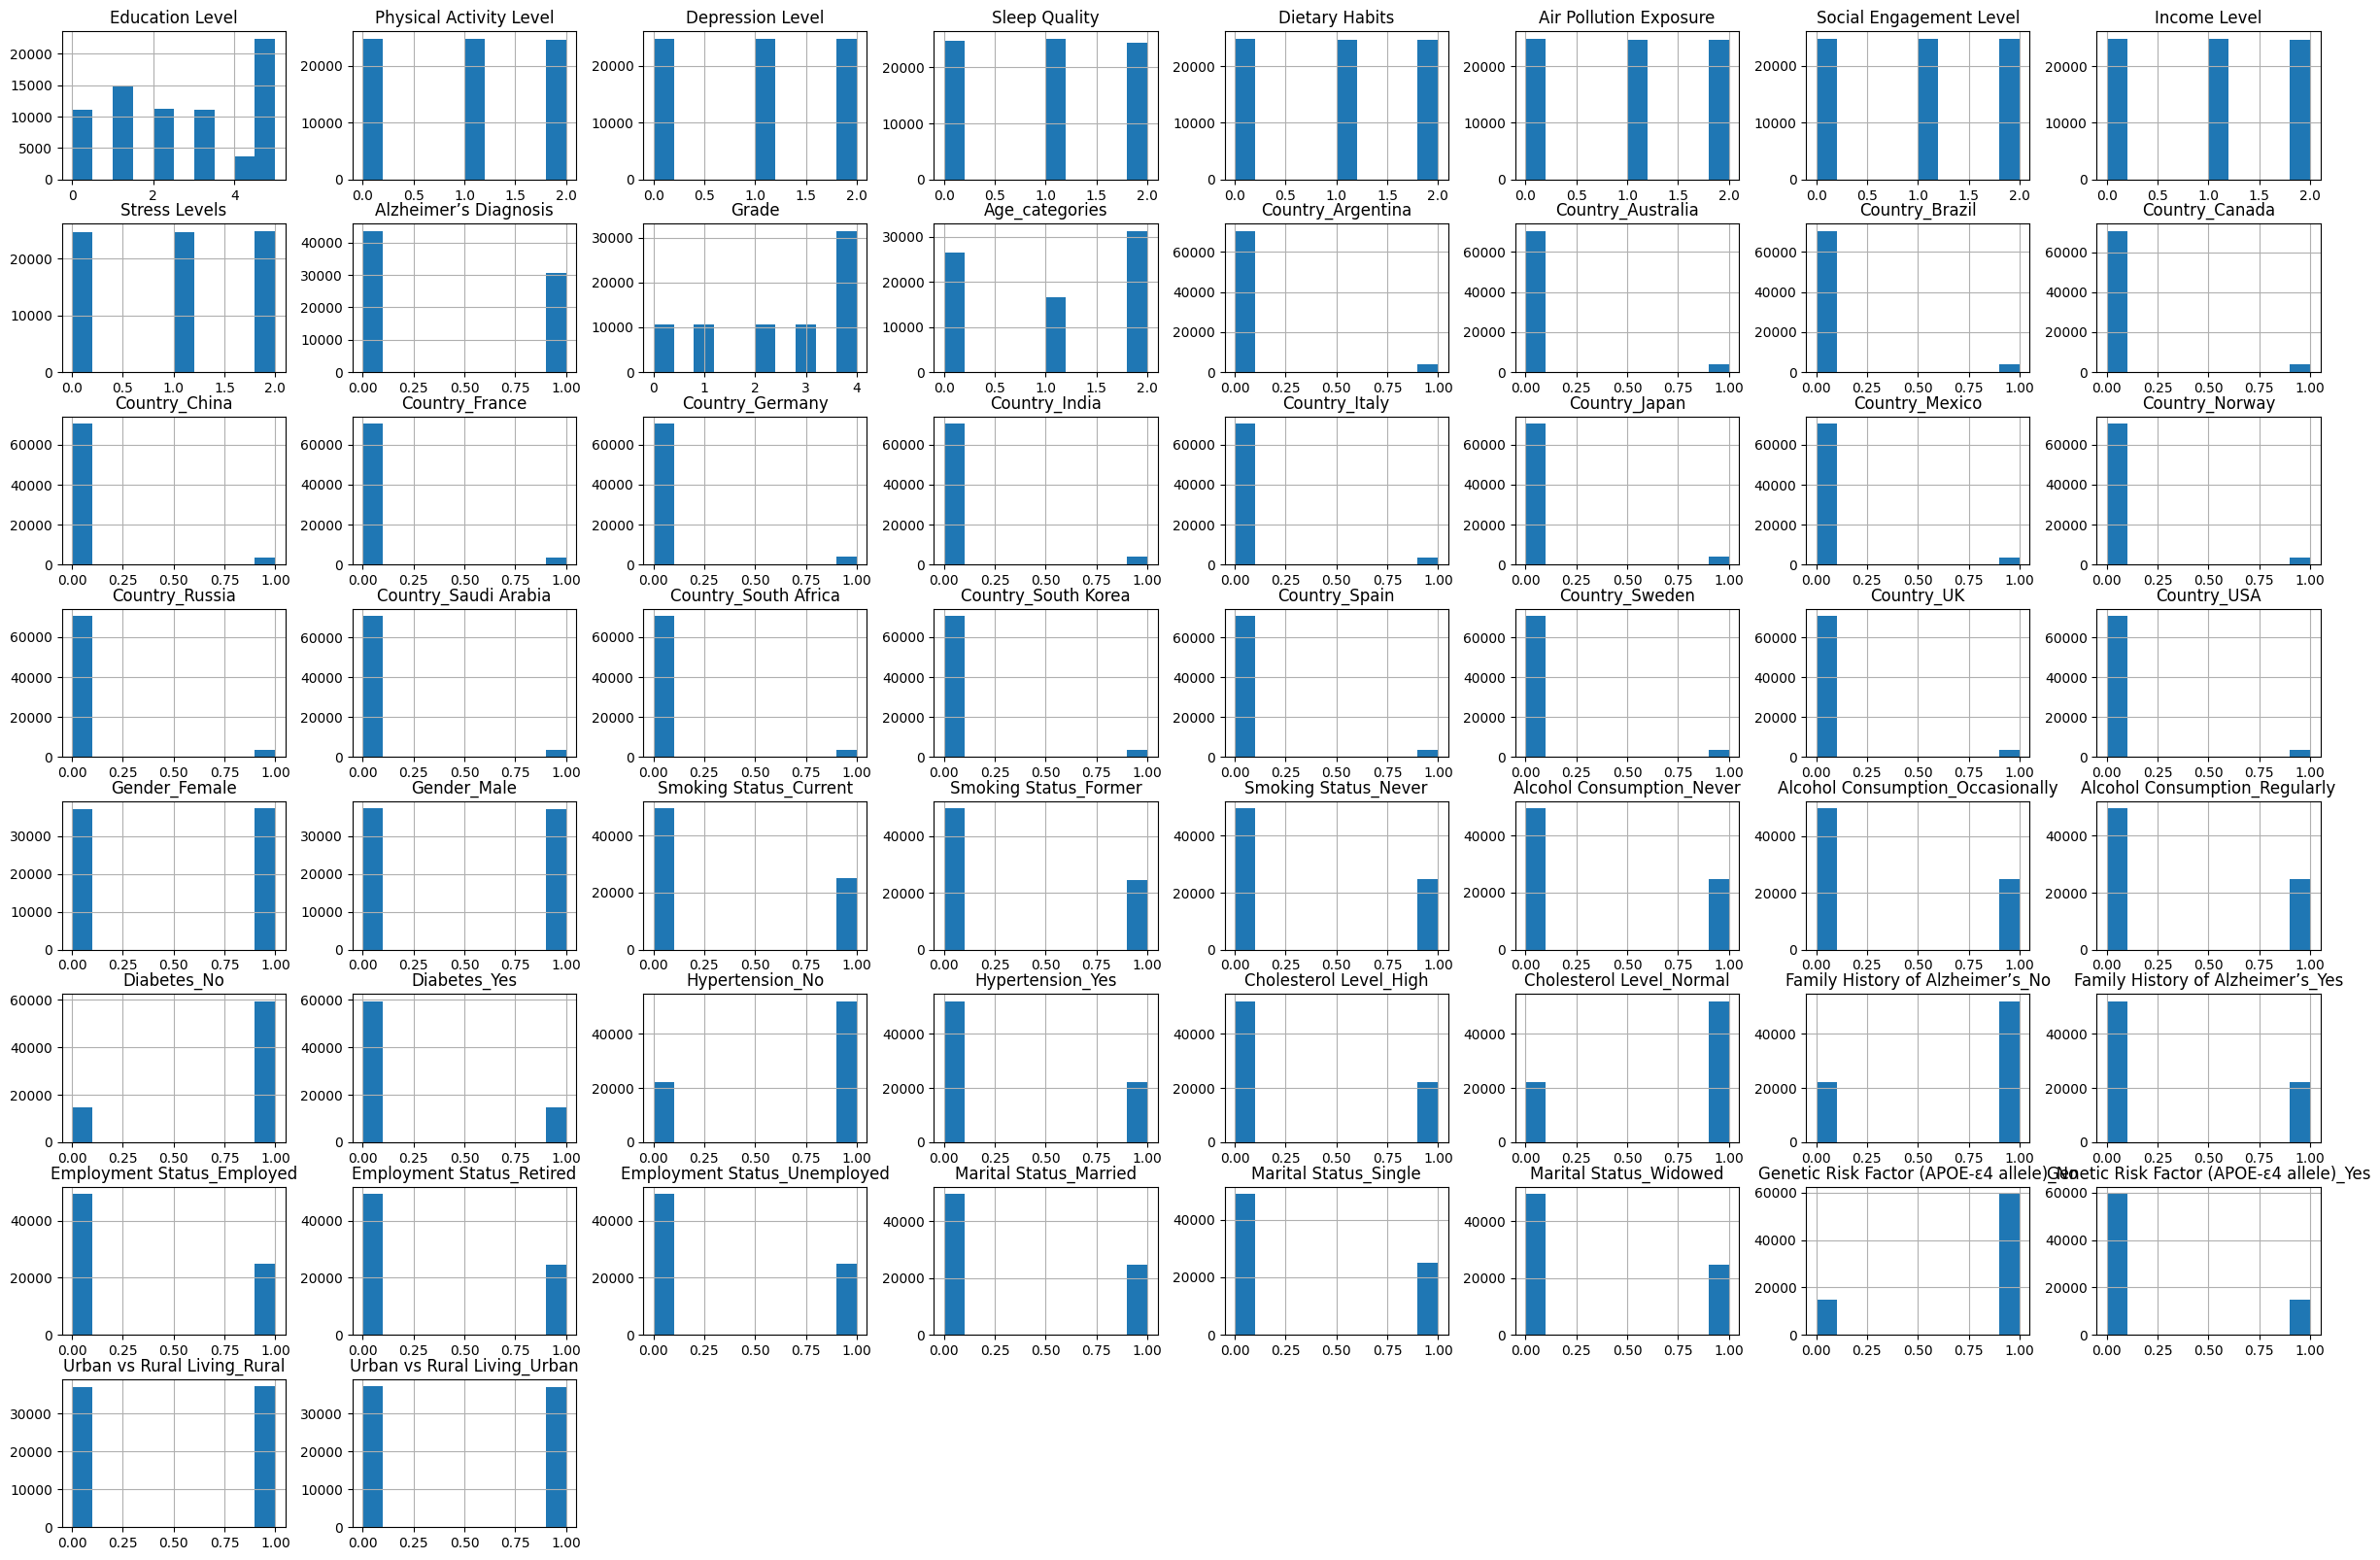

In [ ]:
df.hist(figsize=(30, 20))
plt.show()

## Bar plots

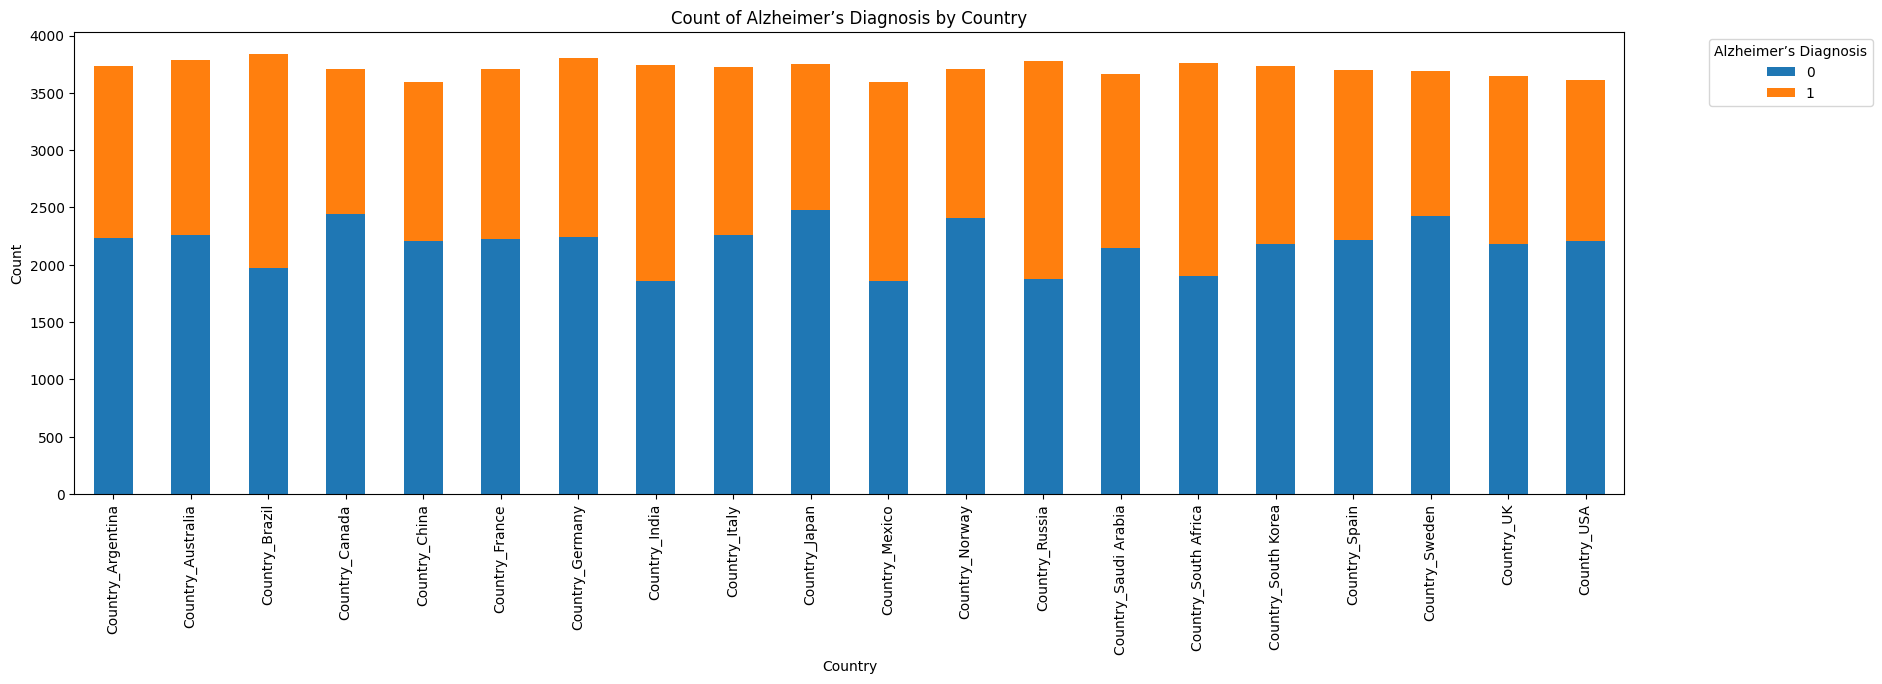

In [ ]:
country_columns = [
    'Country_Argentina', 'Country_Australia', 'Country_Brazil', 'Country_Canada',
    'Country_China', 'Country_France', 'Country_Germany', 'Country_India',
    'Country_Italy', 'Country_Japan', 'Country_Mexico', 'Country_Norway',
    'Country_Russia', 'Country_Saudi Arabia', 'Country_South Africa',
    'Country_South Korea', 'Country_Spain', 'Country_Sweden', 'Country_UK',
    'Country_USA'
]

country_diagnosis_counts = {}

for country_col in country_columns:
    country_df = df[df[country_col] == 1]

    diagnosis_counts = country_df['Alzheimer’s Diagnosis'].value_counts()

    country_diagnosis_counts[country_col] = diagnosis_counts

diagnosis_counts_df = pd.DataFrame(country_diagnosis_counts).T

diagnosis_counts_df.plot(kind='bar', figsize=(20, 6), stacked=True)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Count of Alzheimer’s Diagnosis by Country')
plt.legend(title='Alzheimer’s Diagnosis', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## Correlation heatmaps


<Axes: >

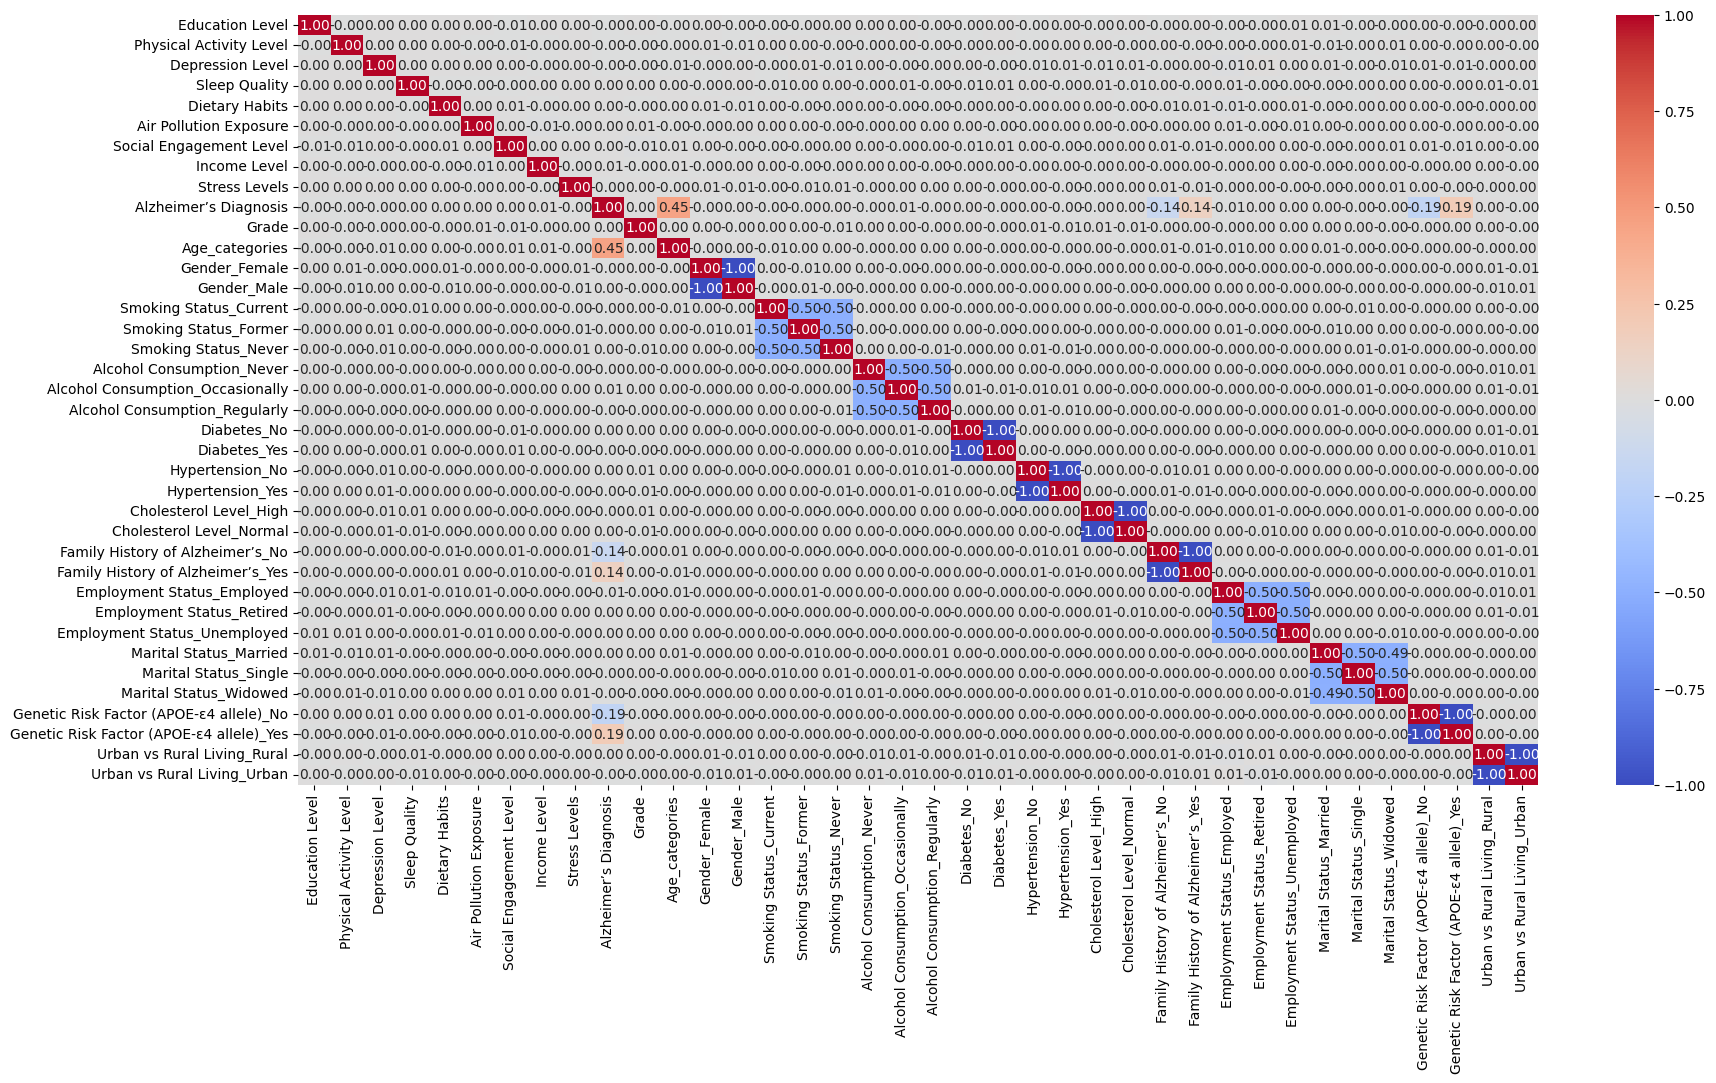

In [ ]:
country_columns = [col for col in df.columns if col.startswith('Country_')]

corr_columns_list = [col for col in df.columns if col not in country_columns]

fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(df[corr_columns_list].corr(), annot=True, cmap='coolwarm',fmt=".2f", ax=ax)

<Axes: >

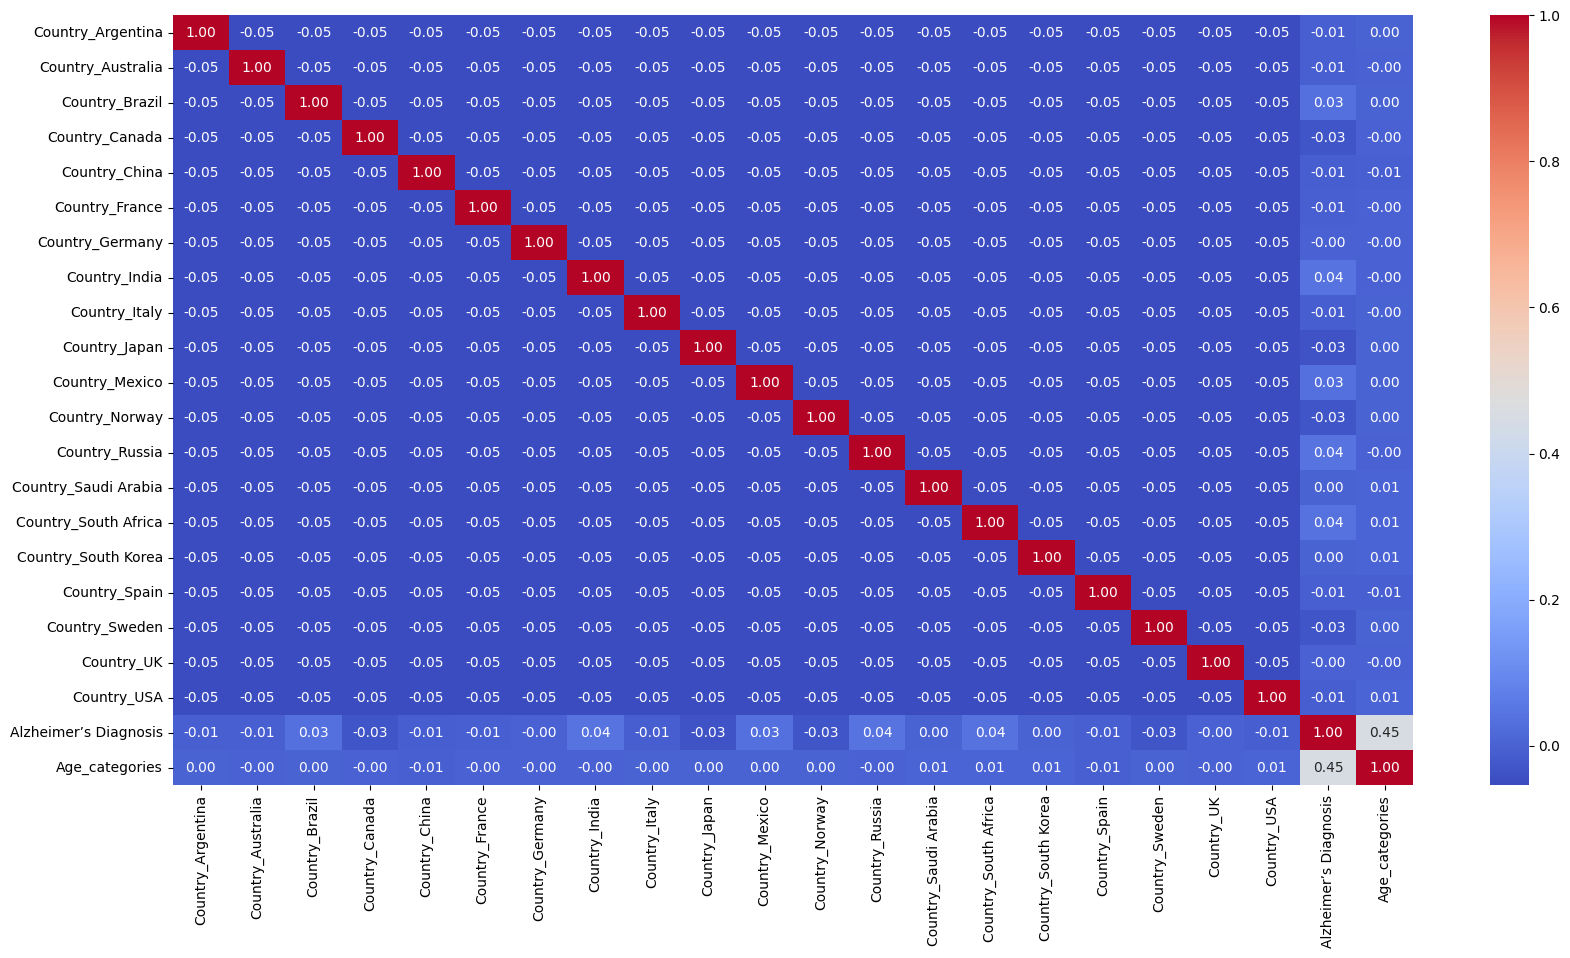

In [ ]:
country_columns.append('Alzheimer’s Diagnosis')
country_columns.append('Age_categories')

fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(df[country_columns].corr(), annot=True, cmap='coolwarm',fmt=".2f", ax=ax)

seem like no column wanna be droped

In [ ]:
df['Alzheimer’s Diagnosis'].value_counts()

,count
Alzheimer’s Diagnosis,
0,43570
1,30713


# modeling

## loading libraries

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder



In [ ]:
X = df.drop(columns=['Alzheimer’s Diagnosis'])
y = df['Alzheimer’s Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid_lr = {
    'C': [0.1, 1, 10],
    'penalty': ['l2']
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2']
}

## Model Fitting

In [ ]:
grid_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy')
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy')
grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5, scoring='accuracy')
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')


In [ ]:
xgb_model.fit(X_train, y_train)
grid_lr.fit(X_train, y_train)
grid_knn.fit(X_train, y_train)
#grid_svm.fit(X_train, y_train)
grid_dt.fit(X_train, y_train)
grid_rf.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:16:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._v

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [ ]:
Best_lr = grid_lr.best_estimator_
Best_knn = grid_knn.best_estimator_
#Best_svm = grid_svm.best_estimator_
Best_dt = grid_dt.best_estimator_
Best_rf = grid_rf.best_estimator_

y_pred_best_lr = Best_lr.predict(X_test)
y_pred_best_knn = Best_knn.predict(X_test)
#y_pred_best_svm = Best_svm.predict(X_test)
y_pred_best_dt = Best_dt.predict(X_test)
y_pred_best_rf = Best_rf.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)




In [ ]:
print("Logistic Regression (Best)")
print(accuracy_score(y_test, y_pred_best_lr))
print(classification_report(y_test, y_pred_best_lr))
print(confusion_matrix(y_test, y_pred_best_lr))

print("\nK-Nearest Neighbors (Best)")
print(accuracy_score(y_test, y_pred_best_knn))
print(classification_report(y_test, y_pred_best_knn))
print(confusion_matrix(y_test, y_pred_best_knn))

#print("\nSupport Vector Machine (Best)")
#print(accuracy_score(y_test, y_pred_best_svm))
#print(classification_report(y_test, y_pred_best_svm))
#print(confusion_matrix(y_test, y_pred_best_svm))

print("\nDecision Tree (Best)")
print(accuracy_score(y_test, y_pred_best_dt))
print(classification_report(y_test, y_pred_best_dt))
print(confusion_matrix(y_test, y_pred_best_dt))

print("\nRandom Forest (Best)")
print(accuracy_score(y_test, y_pred_best_rf))
print(classification_report(y_test, y_pred_best_rf))
print(confusion_matrix(y_test, y_pred_best_rf))

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("XGBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


Logistic Regression (Best)
0.7255165915056876
              precision    recall  f1-score   support

           0       0.77      0.76      0.76      8719
           1       0.66      0.68      0.67      6138

    accuracy                           0.73     14857
   macro avg       0.72      0.72      0.72     14857
weighted avg       0.73      0.73      0.73     14857

[[6585 2134]
 [1944 4194]]

K-Nearest Neighbors (Best)
0.6758430369522784
              precision    recall  f1-score   support

           0       0.70      0.77      0.74      8719
           1       0.63      0.54      0.58      6138

    accuracy                           0.68     14857
   macro avg       0.66      0.66      0.66     14857
weighted avg       0.67      0.68      0.67     14857

[[6748 1971]
 [2845 3293]]

Decision Tree (Best)
0.7154203405801979
              precision    recall  f1-score   support

           0       0.78      0.72      0.75      8719
           1       0.64      0.71      0.67      